In [58]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("kidneyChronic.csv")

In [62]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,119,85,35,41,116,45,93,47,3,6,4,3,3,3,2
top,60,80,1.02,0,0,normal,normal,notpresent,notpresent,?,?,1.2,?,?,?,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,19,40,87,88,52,70,105,130,251,258,362,317,323,339,250


In [4]:
df = df.replace('\\t', '', regex=True).replace('?', method='bfill')

In [5]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [6]:

features_to_encode = ['rbc', 'pc', 'pcc', 'dm', 'cad', 'appet', 'pe', 'ane', 'ba','htn']
for feature in features_to_encode:
    df = encode_and_bind(df, feature)




In [7]:
from sklearn.model_selection import train_test_split

X = df[['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'htn_no', 'htn_yes', 'rbc_abnormal', 'rbc_normal',
       'pc_abnormal', 'pc_normal', 'pcc_notpresent', 'pcc_present', 'dm_ yes',
       'dm_no', 'dm_yes', 'cad_no', 'cad_yes', 'appet_good', 'appet_poor',
       'pe_no', 'pe_yes', 'ane_no', 'ane_yes', 'ba_notpresent', 'ba_present']]  # Features
y = df['class']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [8]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

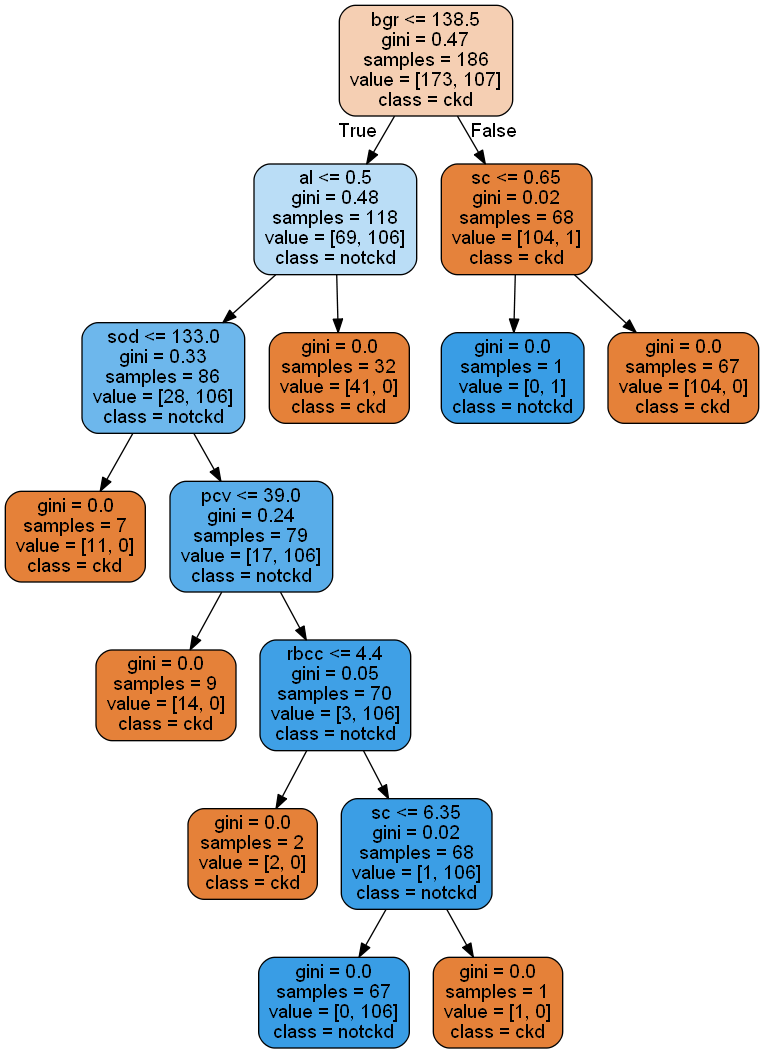

In [9]:
import pydot
estimator = clf.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns,
                class_names = ['ckd','notckd'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png('tree.png')

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [49]:
#!pip install pydot

Text(0.5, 0, 'Relative Importance')

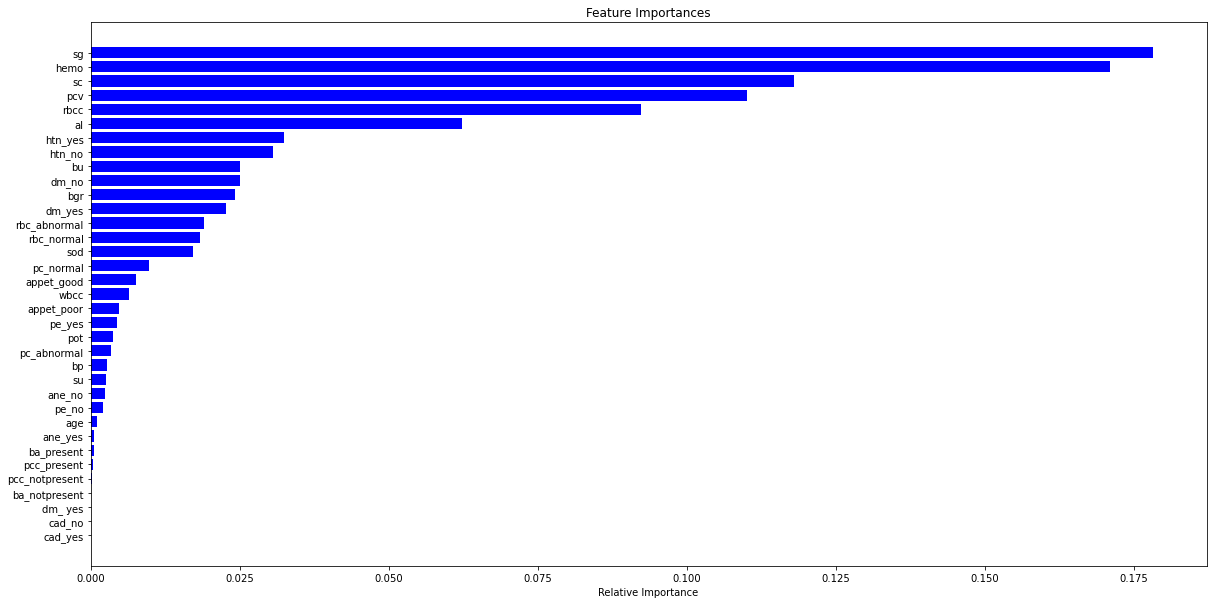

In [10]:

import numpy as np
import matplotlib.pyplot as plt
importances = clf.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [13]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [14]:
metrics.confusion_matrix(y_test, y_pred)

array([[74,  0],
       [ 0, 46]], dtype=int64)

In [15]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        74
      notckd       1.00      1.00      1.00        46

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



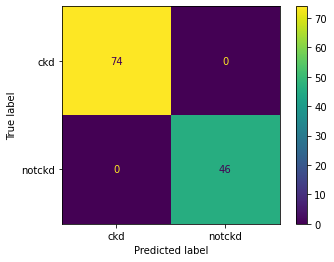

In [16]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

In [ ]:
#data validation
data = {"y_test": y_test.reset_index(), 
        "y_pred": pd.Series(y_pred, name='prediction')}
final_df = pd.concat(data, axis=1)

final_df[final_df.y_test['class'] != final_df.y_pred['prediction']]


In [75]:
X_test.merge(final_df, left_index=True, right_index=True)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,appet_poor,pe_no,pe_yes,ane_no,ane_yes,ba_notpresent,ba_present,"(y_test, index)","(y_test, class)","(y_pred, prediction)"
84,59,70,1.01,3,0,76,186,15,135,7.6,...,1,0,1,0,1,1,0,4,ckd,ckd
93,73,100,1.01,3,2,295,90,5.6,140,2.9,...,1,1,0,1,0,1,0,324,notckd,notckd
99,56,180,1.015,0,4,298,24,1.2,139,3.9,...,1,0,1,1,0,1,0,344,notckd,notckd
7,24,100,1.015,2,4,410,31,1.1,114,3.7,...,0,0,1,1,0,1,0,99,ckd,ckd
69,26,70,1.015,0,4,250,20,1.1,137,4.4,...,0,1,0,1,0,1,0,246,ckd,ckd
58,73,80,1.02,2,0,253,142,4.6,138,5.8,...,0,1,0,1,0,1,0,327,notckd,notckd
78,70,80,1.01,1,0,158,85,3.2,141,3.5,...,0,0,1,1,0,1,0,8,ckd,ckd
62,15,60,1.02,3,0,86,15,0.6,138,4,...,0,1,0,1,0,1,0,262,notckd,notckd
47,11,80,1.01,3,0,70,17,0.8,125,4,...,0,1,0,1,0,1,0,392,notckd,notckd
2,62,80,1.01,2,3,423,53,1.8,111,2.5,...,1,1,0,0,1,1,0,194,ckd,ckd
